# TP2 Classification de voyelles par lois gaussiennes
NOM - PRÉNOM : Gonzalez Jean-Loup

Déposer le notebook sur moodle à la fin de la séance.

### Vérification des données


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()
# Vérifier le contenu et la taille des matrices
print(np.shape(app_aa),np.shape(app_ii),np.shape(app_uu))
print(app_aa,app_ii,app_uu)
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. TP1).

(80, 2) (80, 2) (80, 2)
[[ 27.94649426 193.26043937]
 [ 23.14986615 114.84922022]
 [ 23.00731261 100.39365379]
 [  1.45004927 155.53746105]
 [ 14.50312045 122.1000212 ]
 [  8.20853606 111.69150449]
 [  1.52548402 127.34358516]
 [  9.04626393 110.78416685]
 [ 12.75436068 111.31701892]
 [ -0.23600434 133.65557706]
 [  6.06083643 135.74889396]
 [  6.72739394 126.6562722 ]
 [  2.51335688 144.98423692]
 [  1.84464067 132.47856198]
 [ 17.41859287  91.89945614]
 [ 10.30846081 149.34899657]
 [ 16.98414635 109.99494824]
 [ 21.11818768  94.65383269]
 [ 23.63109776 125.15601874]
 [ 34.11440276  78.22584058]
 [ 28.62754729  77.84191263]
 [ 10.55791287 101.88683033]
 [ 16.23432234  81.31978426]
 [  7.63526955  80.20708085]
 [  9.09241069  92.72096185]
 [ 19.85552283  75.72337304]
 [-10.37307836 125.17771915]
 [ 14.09085022  63.05278157]
 [ 12.08950055  54.67092319]
 [  8.47399676  71.69340087]
 [ 14.73269077  61.85301402]
 [ 16.77701564  54.06864293]
 [ -0.79536829  85.36480752]
 [ 16.82922543  58.

(array([ 7.,  6.,  5.,  8., 17., 12., 15.,  9.,  0.,  1.]),
 array([-23.520093  , -20.53516589, -17.55023879, -14.56531168,
        -11.58038457,  -8.59545746,  -5.61053036,  -2.62560325,
          0.35932386,   3.34425097,   6.32917807]),
 <BarContainer object of 10 artists>)

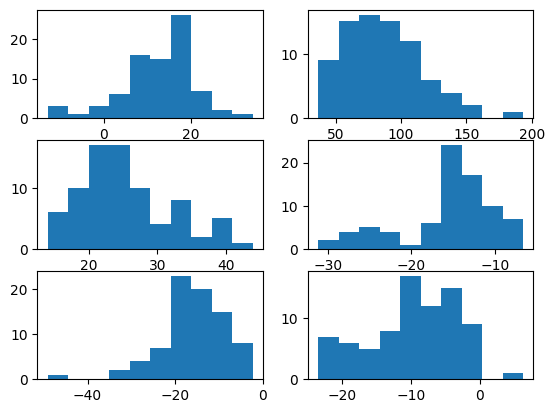

In [27]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, 
# nb_colonnes, numero_trace), 
# l'histogramme de chacune des classes : aa, uu et ii.
plt.subplot(3,2,1)
plt.hist(app_aa[:,0])
plt.subplot(3,2,2)
plt.hist(app_aa[:,1])
plt.subplot(3,2,3)
plt.hist(app_uu[:,0])
plt.subplot(3,2,4)
plt.hist(app_uu[:,1])
plt.subplot(3,2,5)
plt.hist(app_ii[:,0])
plt.subplot(3,2,6)
plt.hist(app_ii[:,1])

# Que pouvez-vous conclure ? Ecrire quelques lignes pour exppiquer
# on voit que pour les 3 jeux de donnée (aa, uu, ii) les données
# suivent une loi gaussienne. Donc le modèle utilisant une loi  gaussienne
# correspond aux données auxquelles ont veut l'appliquer. On peut donc
# supposer que le modele a des chances de bien fonctionner


### Utilisation de lois gaussiennes

In [42]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice 
# de covariance) de chaque classe. 
# Quelles sont les dimensions des variables crées ; que contiennent-elles ? 
meanAAX=app_aa[:,0].mean()
meanAAY=app_aa[:,1].mean()
meanAA=[meanAAX,meanAAY]

meanUUX=app_uu[:,0].mean()
meanUUY=app_uu[:,1].mean()
meanUU=[meanUUX,meanUUY]

meanIIX=app_ii[:,0].mean()
meanIIY=app_ii[:,1].mean()
meanII=[meanIIX,meanIIY]

print(meanAA,meanUU,meanII)

covAA=np.cov(app_aa)
covUU=np.cov(app_uu)
covII=np.cov(app_ii)

#variables créées de dim 2 pour les moyennes
#de dimension (80x80) pour les matrices de covariances

[12.734108092002561, 86.92218349839787] [25.364602564442748, -15.633092214273386] [-15.842582706029958, -9.718477907355412]
[[13664.35022341  7579.59099294  6396.5206786  ...  4496.85845452
   3410.07604595  4691.18497788]
 [ 7579.59099294  4204.38576887  3548.13875003 ...  2494.39946145
   1891.56317428  2602.19204157]
 [ 6396.5206786   3548.13875003  2994.3229003  ...  2105.05787855
   1596.31607701  2196.02551365]
 ...
 [ 4496.85845452  2494.39946145  2105.05787855 ...  1479.8900518
   1122.23626056  1543.84178425]
 [ 3410.07604595  1891.56317428  1596.31607701 ...  1122.23626056
    851.01877872  1170.73239917]
 [ 4691.18497788  2602.19204157  2196.02551365 ...  1543.84178425
   1170.73239917  1610.55711665]] [[1813.79106737 1702.37546933 1565.09645098 ...  912.68393604
   750.99846311 1055.5407785 ]
 [1702.37546933 1597.80378828 1468.95739715 ...  856.6205733
   704.86694091  990.70215998]
 [1565.09645098 1468.95739715 1350.50113816 ...  787.54296174
   648.02669417  910.81225176]

In [8]:
#4- RECONNAISSANCE : écrire une fonction classer qui renvoie la classe obtenue 
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle
# de chaque classe) 
# sur l'observation fournie en entrée :

# comme les observations se regroupent sous forme d'une gausienne, 
# mais les matrices de covariance ne sont pas les mêmes,
# ont peut utiliser l'hypothèse 1 du cours, p41 (en simplifiant la formule
# et  en passant par le log)
def classer(baseTest,meanAA,covAA,meanUU,covUU,meanII,covII):
    
# Exemple de résultat : 
# classe = classer(tst_aa[0,:], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
# => no_classe = 1

In [9]:
#5- Des observations à tester sont présentes dans le fichier Pickle suivant : TST.pkl
# Charger ces données de tests comme  pour les données d'apprentissage)
# Vérifier leur dimensions et leur contenu


In [21]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification 


In [ ]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant 


### Visualisation  des résultats

In [1]:
#9- Représenter en 2D et par des couleurs différentes les nuages de points correspondant 
# aux données d'apprentissage

#10- Afficher les centroïdes des différentes classes.



In [2]:
#11- Réaliser une animation pour l'affichage des points de test (un par un avec des couleurs par exemple...).

